<a href="https://colab.research.google.com/github/laurenfranz/Space-X-Landing-Project/blob/main/SpotifyAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requesting Spotify API Playlist Data**

In this notebook, I request the Spotify API to retrieve data on a playlist containing my most listened to songs in  2021. 

In [ ]:
# Importing libraries
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
import requests
from urllib.parse import urlencode
import base64
import webbrowser

Connecting to the API

In [ ]:
#@title Default title text
# App credentials and opening spotify login
client_id = "0321d43de77e48b4a09da10343f9d668"
client_secret = "3543be09e73c4f7db5aaccde6825f565"

auth_headers = {
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": "http://localhost:7777/callback",
    "scope": "user-library-read"
}

webbrowser.open("https://accounts.spotify.com/authorize?" + urlencode(auth_headers))

True

In [ ]:
# Login authorization code
code = "AQDE6o_9LA34V0Jj-KCwKWCwBAxBI_yu4svKN5O0PwVFsKDVKbuL12DBX_zomz6D1BeAo5h4LqiwrqBee6DRF90RHuhe2NEdiaAsvp4S0B5nPLeyHX6NXW7O8uGZNafQR8eIAxJmNcxL_ykOD_fMS17TwSz0t1pp0fpsWX8JeGIJwrgdjLg2Ce37_1laim4cGoASzwk"

In [ ]:
# Requesting Spotify access token

encoded_credentials = base64.b64encode(client_id.encode() + b':' + client_secret.encode()).decode("utf-8")

token_headers = {
    "Authorization": "Basic " + encoded_credentials,
    "Content-Type": "application/x-www-form-urlencoded"
}

token_data = {
    "grant_type": "authorization_code",
    "code": code,
    "redirect_uri": "http://localhost:7777/callback"
}

r = requests.post("https://accounts.spotify.com/api/token", data=token_data, headers=token_headers)


In [ ]:
token = r.json()["access_token"]

print(token)

BQABkWrZxWhzTK9ftNTC4ZDmdltPlsnEVabKspGAl8gBQvnckXSU6XxtOCmDBw7lwEuXlQ5abLgUQJWTc2WvkYTgDjKoT3R7Gj5BR5DvHLl0ET7bsX3WKdhx7p3qa01VhLG1qEkHT0qWhX6s68pWLHucm7Kj7Sq9QvzyMTSyeUxn_Eoc-LoLyBAkpBeZZHk


Requesting the API

In [ ]:
## Last 50 saved tracks and other information
user_headers = {
    "Authorization": "Bearer " + token,
    "Content-Type": "application/json"
}

user_params = {
    "limit": 50
}

user_tracks_response = requests.get("https://api.spotify.com/v1/me/tracks", params=user_params, headers=user_headers)

print(user_tracks_response.json())

{'href': 'https://api.spotify.com/v1/me/tracks?offset=0&limit=50', 'items': [{'added_at': '2022-10-15T20:03:59Z', 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6rniTPs9zN26kYnkPdFl1U'}, 'href': 'https://api.spotify.com/v1/artists/6rniTPs9zN26kYnkPdFl1U', 'id': '6rniTPs9zN26kYnkPdFl1U', 'name': 'Sir Chloe', 'type': 'artist', 'uri': 'spotify:artist:6rniTPs9zN26kYnkPdFl1U'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'K

In [ ]:
# Requesting track information from my playlist

user_headers = {
    "Authorization": "Bearer " + token,
    "Content-Type": "application/json"
}

user_params = {
    "limit": 50
}

playlist_tracks = requests.get("https://api.spotify.com/v1/playlists/5uwcnAyvAWdlAhrNLfsrFp/tracks", params=user_params, headers=user_headers)

print(playlist_tracks.json())

{'href': 'https://api.spotify.com/v1/playlists/5uwcnAyvAWdlAhrNLfsrFp/tracks?offset=0&limit=50', 'items': [{'added_at': '2022-10-19T04:48:35Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1263762080'}, 'href': 'https://api.spotify.com/v1/users/1263762080', 'id': '1263762080', 'type': 'user', 'uri': 'spotify:user:1263762080'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7ptm7G8z8VVvwBnDq8fAmD'}, 'href': 'https://api.spotify.com/v1/artists/7ptm7G8z8VVvwBnDq8fAmD', 'id': '7ptm7G8z8VVvwBnDq8fAmD', 'name': 'Microwave', 'type': 'artist', 'uri': 'spotify:artist:7ptm7G8z8VVvwBnDq8fAmD'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE'

In [ ]:
# Printing response headers
print(playlist_tracks.headers)

{'content-type': 'application/json; charset=utf-8', 'cache-control': 'public, max-age=0', 'etag': '"MC-IjZkZWZlMTBlMzE2OGZhNWMzYTA5YzVjNmNiOTM0MzRjIg=="', 'x-robots-tag': 'noindex, nofollow', 'access-control-allow-origin': '*', 'access-control-allow-headers': 'Accept, App-Platform, Authorization, Content-Type, Origin, Retry-After, Spotify-App-Version, X-Cloud-Trace-Context, client-token, content-access-token', 'access-control-allow-methods': 'GET, POST, OPTIONS, PUT, DELETE, PATCH', 'access-control-allow-credentials': 'true', 'access-control-max-age': '604800', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=31536000', 'x-content-type-options': 'nosniff', 'date': 'Wed, 19 Oct 2022 05:34:36 GMT', 'server': 'envoy', 'Via': 'HTTP/2 edgeproxy, 1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000', 'Transfer-Encoding': 'chunked'}


In [ ]:
# Printing response content
print(playlist_tracks.text)

{
  "href" : "https://api.spotify.com/v1/playlists/5uwcnAyvAWdlAhrNLfsrFp/tracks?offset=0&limit=50",
  "items" : [ {
    "added_at" : "2022-10-19T04:48:35Z",
    "added_by" : {
      "external_urls" : {
        "spotify" : "https://open.spotify.com/user/1263762080"
      },
      "href" : "https://api.spotify.com/v1/users/1263762080",
      "id" : "1263762080",
      "type" : "user",
      "uri" : "spotify:user:1263762080"
    },
    "is_local" : false,
    "primary_color" : null,
    "track" : {
      "album" : {
        "album_type" : "single",
        "artists" : [ {
          "external_urls" : {
            "spotify" : "https://open.spotify.com/artist/7ptm7G8z8VVvwBnDq8fAmD"
          },
          "href" : "https://api.spotify.com/v1/artists/7ptm7G8z8VVvwBnDq8fAmD",
          "id" : "7ptm7G8z8VVvwBnDq8fAmD",
          "name" : "Microwave",
          "type" : "artist",
          "uri" : "spotify:artist:7ptm7G8z8VVvwBnDq8fAmD"
        } ],
        "available_markets" : [ "AD", "AE", 

In [ ]:
import json

In [ ]:
# Dictionary containing response content
results2 = json.loads(playlist_tracks.text)

In [ ]:
# Dictionary keys
results2.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [ ]:
# Items key contains the information I need
items = results2['items']

In [ ]:
# Keys in items dictionary
items[0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

# Exploring track variables

In [ ]:
# The track dictionary contains the information I need
items[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [ ]:
items[0]['track']['artists'] # dictionary containing artist information

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7ptm7G8z8VVvwBnDq8fAmD'},
  'href': 'https://api.spotify.com/v1/artists/7ptm7G8z8VVvwBnDq8fAmD',
  'id': '7ptm7G8z8VVvwBnDq8fAmD',
  'name': 'Microwave',
  'type': 'artist',
  'uri': 'spotify:artist:7ptm7G8z8VVvwBnDq8fAmD'}]

In [ ]:
items[0]['track']['duration_ms'] # provides length of song

222684

In [ ]:
items[0]['track']['id'] # track id

'1Ob3PgYNbJpiDdNZGbQkaD'

In [ ]:
items[0]['track']['name'] # track name

'Georgia On My Mind'

In [ ]:
items[0]['track']['popularity'] # track popularity

38

In [ ]:
items[0]['track']['album'].keys() # dictionary containing album information

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [ ]:
items[0]['track']['artists'][0].keys() # dictionary containing artist information

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [ ]:
items[0]['track']['artists'][0]['id'] #artist id

'7ptm7G8z8VVvwBnDq8fAmD'

In [ ]:
items[0]['track']['artists'][0]['name'] #artist name

'Microwave'

In [ ]:
items[0]['track']['album']['id'] #album id

'0mVA7YZcuQi3CBB8oiTbEV'

In [ ]:
items[0]['track']['album']['name'] #album name

'keeping up'

In [ ]:
items[0]['track']['album']['release_date'] #album release date

'2018-09-21'

# Creating the dataframe

In [ ]:
## Putting track information into lists

track_name=[]
track_id=[]
duration=[]
popularity=[]
artist_name=[]
artist_id=[]
album_name=[]
release_date=[]
album_id=[]


for i, item in enumerate(items):
    track_name.append(item['track']['name'])
    track_id.append(item['track']['id'])
    duration.append(item['track']['duration_ms'])
    popularity.append(item['track']['popularity'])
    album_name.append(item['track']['album']['name'])
    release_date.append(item['track']['album']['release_date'])
    album_id.append(item['track']['album']['id'])
    artist_name.append(item['track']['artists'][0]['name'])
    artist_id.append(item['track']['artists'][0]['id'])
        

In [ ]:
# artist genre and popularity
# Saving artist urls to a list
artist_url=[]

for i, item in enumerate(items):
    artist_url.append(item['track']['artists'][0]['href'])

In [ ]:
# Requesting API to retrieve artist genre and popularity 

user_headers = {
    "Authorization": "Bearer " + token,
    "Content-Type": "application/json"
}

user_params = {
    "limit": 50
}

artist_genres=[]
artist_popularity=[]

for url in artist_url:
    response = requests.get(url, params=user_params, headers=user_headers)
    result = json.loads(response.text)
    artist_genres.append(result['genres'])
    artist_popularity.append(result['popularity'])


In [ ]:
## Saving track urls to a list

track_feature_url=[]

for i, item in enumerate(items):
    track_id = item['track']['id']
    track_feature_url.append('https://api.spotify.com/v1/audio-features/%s' %track_id)

In [ ]:
## Requesting API for track features

acousticness=[]
danceability=[]
energy=[]
instrumentalness=[]
key=[]
loudness=[]
mode=[]
speechiness=[]
tempo=[]
valence=[]

for url in track_feature_url:
    response = requests.get(url, params=user_params, headers=user_headers)
    result = json.loads(response.text)
    acousticness.append(result['acousticness'])
    danceability.append(result['danceability'])
    energy.append(result['energy'])
    instrumentalness.append(result['instrumentalness'])
    key.append(result['key'])
    loudness.append(result['loudness'])
    mode.append(result['mode'])
    speechiness.append(result['speechiness'])
    tempo.append(result['tempo'])
    valence.append(result['valence'])

In [ ]:
# Creating a dataframe from created lists

df = pd.DataFrame(
    {'track_name' : track_name, 'track_id' : track_id, 
     'duration' : duration, 'popularity' : popularity,
     'artist_name' : artist_name, 'artist_id' : artist_id,
     'artist_genres' : artist_genres, 'artist_popularity' : artist_popularity,
     'album_name' : album_name, 'release_date' : release_date,
     'album_id' : album_id, 'acousticness' : acousticness,
     'danceability' : danceability, 'energy' : energy,
     'instrumentalness' : instrumentalness, 'key' : key,
     'loudness' : loudness, 'mode' : mode,
     'speechiness' : speechiness, 'tempo' : tempo, 'valence' : valence
    })

In [ ]:
df.head()

,track_name,track_id,duration,popularity,artist_name,artist_id,artist_genres,artist_popularity,album_name,release_date,album_id,acousticness,danceability,energy,instrumentalness,key,loudness,mode,speechiness,tempo,valence
0,Georgia On My Mind,1Ob3PgYNbJpiDdNZGbQkaD,222684,38,Microwave,7ptm7G8z8VVvwBnDq8fAmD,"[alternative emo, anthem emo, atlanta punk, dreamo, emo, indie rock, pop punk]",48,keeping up,2018-09-21,0mVA7YZcuQi3CBB8oiTbEV,0.180000,0.426,0.427,0.136000,5,-9.152,0,0.0278,72.999,0.186
1,Whimper,4ac3zFX20ZQ4A0h9txyGsr,269826,8,Microwave,7ptm7G8z8VVvwBnDq8fAmD,"[alternative emo, anthem emo, atlanta punk, dreamo, emo, indie rock, pop punk]",48,Much Love,2016-09-30,2fWIkMJVzR4pNmHiqyDzPM,0.006820,0.448,0.660,0.110000,3,-6.052,0,0.0339,127.966,0.273
2,*Equip Sunglasses*,6PY5aUSub1xwqlDrA4aTyL,166000,16,Hot Mulligan,1lKZzN2d4IqiEYxyECIEHI,"[alternative emo, anthem emo, emo, pop punk]",58,you'll be fine,2020-03-06,3CyQYTduFLojdCdM00J02R,0.000732,0.628,0.966,0.000000,8,-3.350,1,0.0633,120.008,0.910
3,Vomit,1Kyh2Eb4webnrFGp0qloJP,176880,13,Microwave,7ptm7G8z8VVvwBnDq8fAmD,"[alternative emo, anthem emo, atlanta punk, dreamo, emo, indie rock, pop punk]",48,Much Love,2016-09-30,2fWIkMJVzR4pNmHiqyDzPM,0.001250,0.470,0.859,0.000131,1,-6.725,1,0.0373,135.545,0.245
4,Swine Driver,69Dqb6NqYZSpaiWWyHOLfk,224468,23,Microwave,7ptm7G8z8VVvwBnDq8fAmD,"[alternative emo, anthem emo, atlanta punk, dreamo, emo, indie rock, pop punk]",48,Swine Driver - Single,2013-03-30,21wRAHf3CUjlB1UHgILJc2,0.001290,0.586,0.948,0.000000,8,-8.087,1,0.0633,140.983,0.297


In [ ]:
# Dataframe overview
df.describe(include='all')

,track_name,track_id,duration,popularity,artist_name,artist_id,artist_genres,artist_popularity,album_name,release_date,album_id,acousticness,danceability,energy,instrumentalness,key,loudness,mode,speechiness,tempo,valence
count,50,50,50.000000,50.00000,50,50,50,50.000000,50,50,50,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
unique,50,50,NaN,NaN,18,18,18,NaN,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Georgia On My Mind,1Ob3PgYNbJpiDdNZGbQkaD,NaN,NaN,Microwave,7ptm7G8z8VVvwBnDq8fAmD,"[alternative emo, anthem emo, atlanta punk, dreamo, emo, indie rock, pop punk]",NaN,"If I Can’t Have Love, I Want Power",2021-08-27,3sq0hRtlT2SYeYajr5Cx22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,15,15,15,NaN,12,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,228428.180000,40.32000,NaN,NaN,NaN,65.420000,NaN,NaN,NaN,0.249589,0.49096,0.645440,0.106322,4.720000,-7.476540,0.70000,0.054704,128.562380,0.359276
std,NaN,NaN,56172.857088,23.68194,NaN,NaN,NaN,18.682186,NaN,NaN,NaN,0.340389,0.10947,0.237473,0.243345,3.162536,3.054532,0.46291,0.042699,30.149228,0.176836
min,NaN,NaN,146546.000000,0.00000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,0.000027,0.24000,0.104000,0.000000,0.000000,-18.739000,0.00000,0.024300,72.999000,0.048800
25%,NaN,NaN,183010.000000,17.50000,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,0.001138,0.42700,0.468750,0.000004,1.000000,-9.063750,0.00000,0.032625,111.602250,0.247750
50%,NaN,NaN,217479.000000,48.00000,NaN,NaN,NaN,61.500000,NaN,NaN,NaN,0.029400,0.49000,0.681000,0.003200,5.500000,-7.237000,1.00000,0.039150,128.467500,0.344000
75%,NaN,NaN,254806.250000,58.75000,NaN,NaN,NaN,83.000000,NaN,NaN,NaN,0.500750,0.57950,0.859000,0.044900,7.750000,-5.296500,1.00000,0.059125,146.504500,0.410750


In [ ]:
# Saving as an Excel file
df.to_excel(r'C:\Users\Casey Easton\Downloads\spotify2021.xlsx', header=True)

# EDA using visualization

In [ ]:
# Importing plotting libraries
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:>

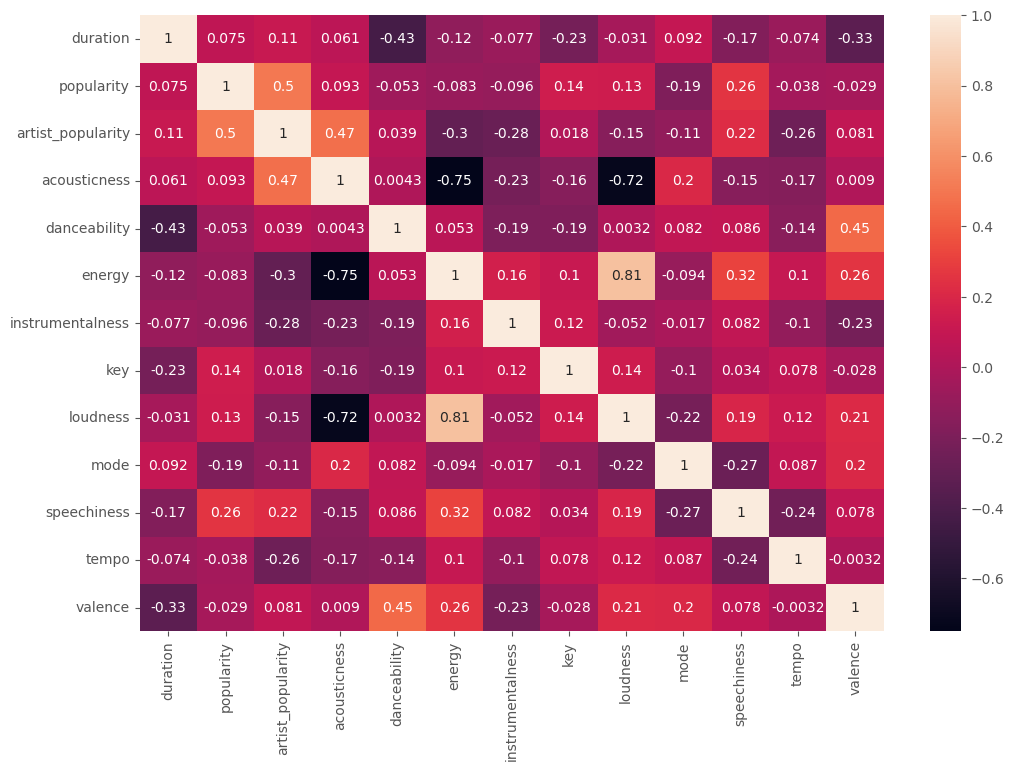

In [ ]:
# Correlation matrix of numerical data
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

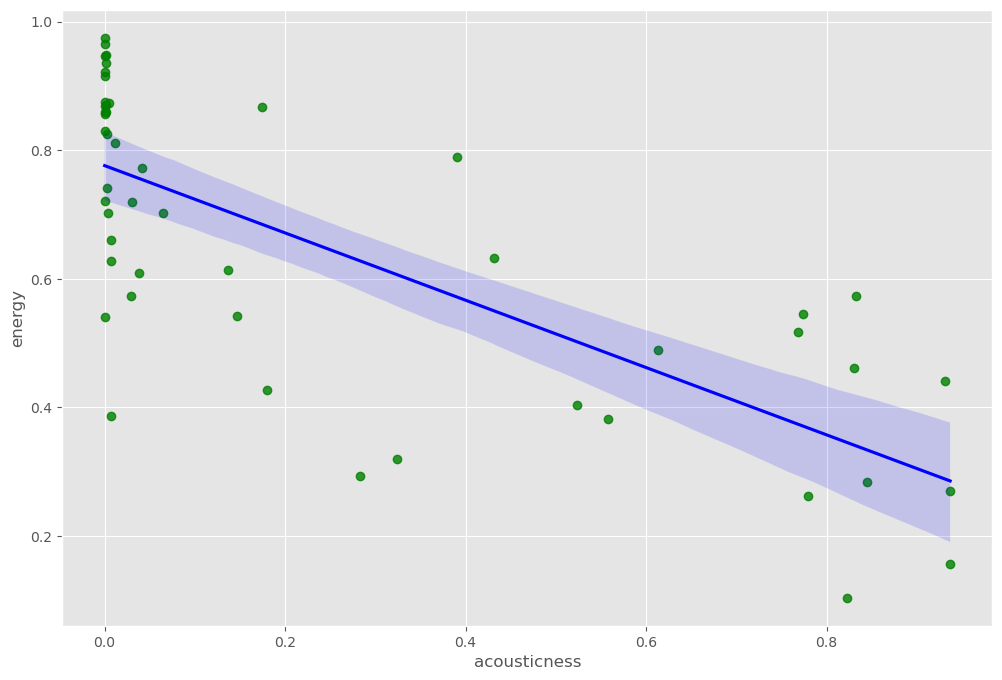

In [ ]:
# Acousticness vs. Energy Regression Plot

sns.regplot(x='acousticness', y='energy', data=df, scatter_kws={"color":"green"}, line_kws={"color":"blue"})